In [14]:
import numpy as np
import json
import pandas as pd
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import sys
import collections
import torch
sys.path.insert(0,"../")
sys.path.insert(0,"../../")

import dl_utils.save_io as savio

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [10]:
n_samples = 100
x_values = [-1,1]
#y_values = [i/2 for i in range(10)]
y_values = [i for i in range(5)]
std = 0.1
cov = 0.2

varbs = []
for x in x_values:
    for y in y_values:
        varbs.append([x,y])
varbs = np.asarray(varbs)

samples = []
og_varbs = []
xmean = 0
ymean = 0
for _ in range(n_samples):
    samp = varbs.copy()
    og_varbs.append(varbs.copy())
    #samp[:,1] += 0.5*np.random.randn(len(samp))
    noise = std*np.random.randn(*samp.shape)
    samp = samp + noise
    samp[:,0] += cov*samp[:,1]
    samples.append(samp)
samples = np.vstack(samples)
og_varbs = np.vstack(og_varbs)
print(samples.shape)

(1000, 2)


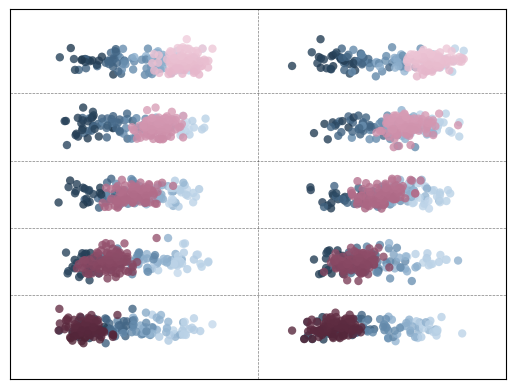

In [11]:
df = pd.DataFrame({
    "x": samples[:,0],
    "y": samples[:,1],
    "hue": samples[:,1],
})
df["x"] = (df["x"]-np.mean(df["x"]))
df["hue"] = df["hue"]-np.min(df["hue"])
df["hue"] = df["hue"]/np.max(df["hue"])



fontsize=25
legendsize = 25
alpha = 0.8
dark = 0.2
light = 0.85
rot = 0
thickness = 0.5
fig = plt.figure()
ax = plt.gca()

intrv_df = df.copy()
intrv_df["y"] = np.asarray(intrv_df["y"])[np.random.permutation(len(intrv_df)).astype(int)]
intrv_cmap = sns.cubehelix_palette(start=-.3, rot=rot, dark=dark, light=light, reverse=True, as_cmap=True)
#intrv_cmap = sns.dark_palette("blue", as_cmap=True)
sns.scatterplot(x="x", y="y", alpha=alpha, data=intrv_df, ax=ax, hue="hue", palette=intrv_cmap, edgecolor="none")

native_cmap = sns.cubehelix_palette(start=0.7, rot=rot, dark=dark, light=light, reverse=True, as_cmap=True)
#native_cmap = sns.dark_palette("red", as_cmap=True)
sns.scatterplot(x="x", y="y", alpha=alpha, data=df, ax=ax, hue="hue", palette=native_cmap, edgecolor="none")
                #hue="hue", palette="blue")
    
## y divider

ax.plot([0,0],[-1,5], "k--", alpha=0.5, linewidth=thickness)
# x dividers
for i in y_values[:-1]:
    y = i+0.5
    ax.plot([-2,2],[y,y], "k--", alpha=0.5, linewidth=thickness)
plt.xlim([-2,2])
plt.ylim([-0.75,4.75])

plt.xlabel("", fontsize=fontsize)
plt.ylabel("", fontsize=fontsize)

plt.xticks([], fontsize=fontsize)
plt.yticks([], fontsize=fontsize)

# # Manually create colorbars / legend patches
# native_cmap = sns.cubehelix_palette(start=0.7, rot=rot, dark=dark, light=light, reverse=True, as_cmap=True)
# intrv_cmap = sns.cubehelix_palette(start=-.3, rot=rot, dark=dark, light=light, reverse=True, as_cmap=True)

# Legend handles: colored rectangles with labels
#native_patch = mpatches.Patch(color=native_cmap(0.8), label="Native")
#intrv_patch = mpatches.Patch(color=intrv_cmap(0.8), label="Intervened")

#ax.legend(handles=[native_patch, intrv_patch], fontsize=legendsize, loc="upper right", bbox_to_anchor=(1.75,1))
plt.legend().set_visible(False)
#plt.savefig("figs/example_divergence.png", dpi=600, bbox_inches="tight")

plt.show()

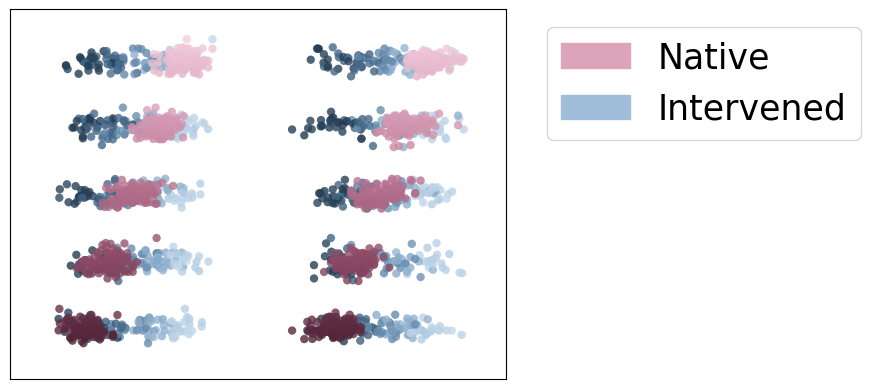

In [12]:
import matplotlib.patches as mpatches
import matplotlib as mpl

df = pd.DataFrame({
    "x": samples[:,0],
    "y": samples[:,1],
    "hue": samples[:,1],
})
df["x"] = (df["x"]-np.mean(df["x"]))
df["hue"] = df["hue"]-np.min(df["hue"])
df["hue"] = df["hue"]/np.max(df["hue"])



fontsize=25
legendsize = 25
alpha = 0.8
dark = 0.2
light = 0.85
rot = 0
fig = plt.figure()
ax = plt.gca()

intrv_df = df.copy()
intrv_df["y"] = np.asarray(intrv_df["y"])[np.random.permutation(len(intrv_df)).astype(int)]
intrv_cmap = sns.cubehelix_palette(start=-.3, rot=rot, dark=dark, light=light, reverse=True, as_cmap=True)
#intrv_cmap = sns.dark_palette("blue", as_cmap=True)
sns.scatterplot(x="x", y="y", alpha=alpha, data=intrv_df, ax=ax, hue="hue", palette=intrv_cmap, edgecolor="none")

native_cmap = sns.cubehelix_palette(start=0.7, rot=rot, dark=dark, light=light, reverse=True, as_cmap=True)
#native_cmap = sns.dark_palette("red", as_cmap=True)
sns.scatterplot(x="x", y="y", alpha=alpha, data=df, ax=ax, hue="hue", palette=native_cmap, edgecolor="none")
                #hue="hue", palette="blue")
    
## y divider
#ax.plot([0,0],[-1,5], "k--", alpha=0.5)
## x dividers
#for i in y_values[:-1]:
#    y = i+0.5
#    ax.plot([-2,2],[y,y], "k--", alpha=0.5)
plt.xlim([-2,2])
plt.ylim([-0.75,4.75])

plt.xlabel("", fontsize=fontsize)
plt.ylabel("", fontsize=fontsize)

plt.xticks([], fontsize=fontsize)
plt.yticks([], fontsize=fontsize)

# # Manually create colorbars / legend patches
# native_cmap = sns.cubehelix_palette(start=0.7, rot=rot, dark=dark, light=light, reverse=True, as_cmap=True)
# intrv_cmap = sns.cubehelix_palette(start=-.3, rot=rot, dark=dark, light=light, reverse=True, as_cmap=True)

# Legend handles: colored rectangles with labels
native_patch = mpatches.Patch(color=native_cmap(0.8), label="Native")
intrv_patch = mpatches.Patch(color=intrv_cmap(0.8), label="Intervened")

ax.legend(handles=[native_patch, intrv_patch], fontsize=legendsize, loc="upper right", bbox_to_anchor=(1.75,1))
#plt.savefig("figs/legend.png", dpi=600, bbox_inches="tight")

plt.show()

# CL Loss

In [15]:
print(og_varbs.shape)
print(samples.shape)

(1000, 2)
(1000, 2)


torch.Size([1000, 10])


In [102]:
def quick_plot(natty, intrv):
    fig = plt.figure()
    plt.scatter(intrv[:,0].numpy(), intrv[:,1].numpy(), color="blue")
    plt.scatter(natty[:,0].numpy(), natty[:,1].numpy(), color="red")
    plt.show()

In [103]:
def rot_fwd(vecs, mtx):
    return torch.matmul(vecs, mtx.weight )

def rot_bck(vecs, mtx):
    return torch.matmul(vecs, mtx.weight.T )

def interchange(trg,src,mtx,mask):
    rot_trg = rot_fwd(trg, mtx)
    rot_src = torch.matmul(src, mtx.weight )
    intrv = rot_trg*(1-mask) + rot_src*mask
    return rot_bck(intrv, mtx)

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

/var/folders/8s/92vmtzc54sb3zxyhsgws4lkw0000gn/T/ipykernel_38120/2269003303.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  natty_varbs = torch.tensor(og_varbs).long()
/var/folders/8s/92vmtzc54sb3zxyhsgws4lkw0000gn/T/ipykernel_38120/2269003303.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(samples).float(), noise


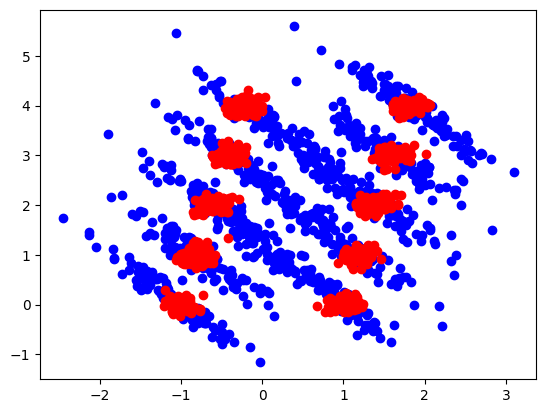

In [105]:
extra_dims = 10
cov_strength = 0.5


d = og_varbs.shape[-1] + extra_dims
mask = torch.zeros(d)
mask[0] = 1

noise = torch.randn(len(og_varbs), extra_dims) + cov * torch.randn(len(og_varbs), extra_dims)*og_varbs[:,1:]
natty_varbs = torch.tensor(og_varbs).long()
natty_samps = torch.cat([
    torch.tensor(samples).float(), noise
], dim=-1)
perm = torch.randperm(len(og_varbs)).long()

intrv_varbs = torch.cat([ og_varbs[:,0:1], og_varbs[perm,1:] ], dim=-1)

trg_vecs = natty_samps.clone()
src_vecs = natty_samps[perm]
rot_mtx = torch.nn.utils.parametrizations.orthogonal(torch.nn.Linear(d,d))

with torch.no_grad():
    intrv_samps = interchange(trg_vecs, src_vecs, rot_mtx, mask)

# Sanity check
quick_plot(natty_samps, intrv_samps)


In [106]:
def get_cl_vectors(natty_varbs, intrv_varbs, natty_vecs, method="sample"):
    cl_vectors = []
    all_idxs = torch.arange(len(natty_varbs)).long()
    for intrv in intrv_varbs:
        valid_bools = (natty_varbs[:,0]==intrv[0])&(natty_varbs[:,1]==intrv[1])
        valid_idxs = all_idxs[valid_bools]
        if method=="sample":
            idx = valid_idxs[int(np.random.randint(len(valid_idxs)))]
            cl_vectors.append(natty_vecs[idx])
        elif method in {"average", "mean"}:
            cl_vectors.append(natty_vecs[valid_idxs].mean(0))
    return torch.vstack(cl_vectors)

In [107]:
def calc_cl_loss(intrv, cl):
    l2 = ((intrv-cl)**2).mean()
    cos = 1-torch.nn.functional.cosine_similarity(intrv,cl)
    return l2 + cos
    
def get_loss(trg, src, mtx, mask, cl_vecs, incl_extra=True, extra_dim=2):
    intrv = interchange(trg, src, mtx, mask)
    if not incl_extra:
        intrv = rot_fwd(intrv, mtx)
        intrv[:,extra_dim:] = 0
        intrv = rot_bck(intrv, mtx)
        cl_vecs = rot_fwd(cl_vecs, mtx)
        cl_vecs[:,extra_dim:] = 0
        cl_vecs = rot_bck(cl_vecs, mtx)
    return calc_cl_loss(intrv, cl_vecs).mean(), intrv
    


### Training Loop

Identity


/var/folders/8s/92vmtzc54sb3zxyhsgws4lkw0000gn/T/ipykernel_38120/3575175995.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  natty_varbs = torch.tensor(og_varbs).long()
/var/folders/8s/92vmtzc54sb3zxyhsgws4lkw0000gn/T/ipykernel_38120/3575175995.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(samples).float(), noise


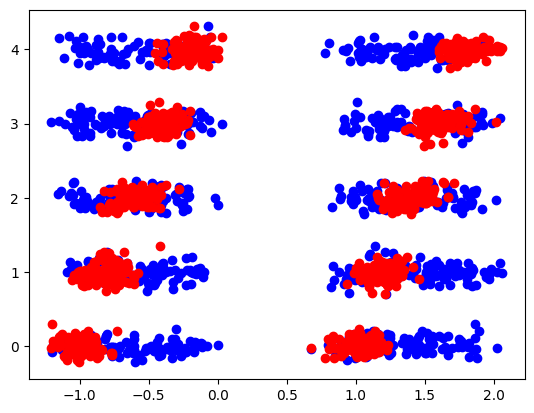

Untrained


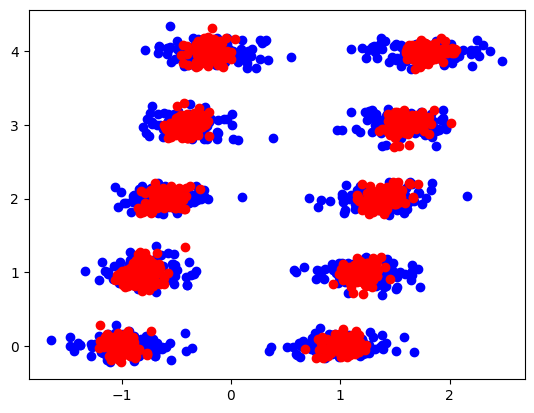

Loss: tensor(1.0252, grad_fn=<MeanBackward0>)


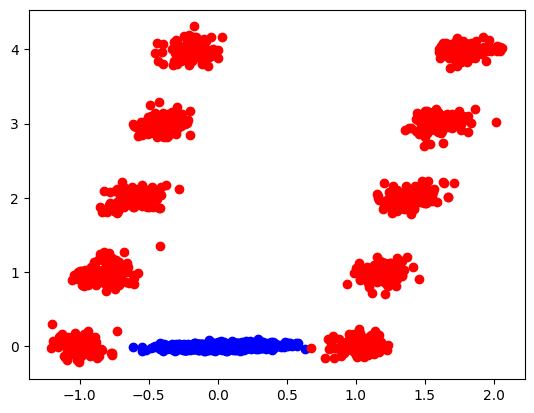

Loss: tensor(0.6691, grad_fn=<MeanBackward0>)


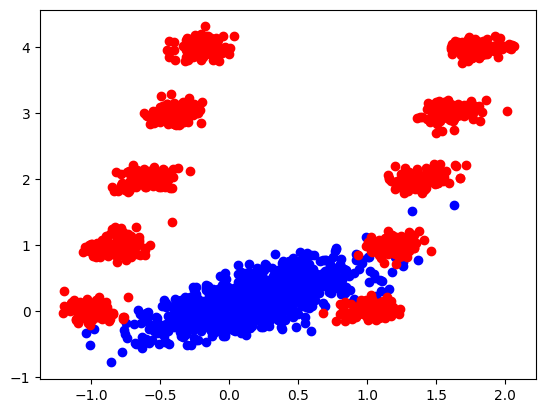

Loss: tensor(0.3483, grad_fn=<MeanBackward0>)


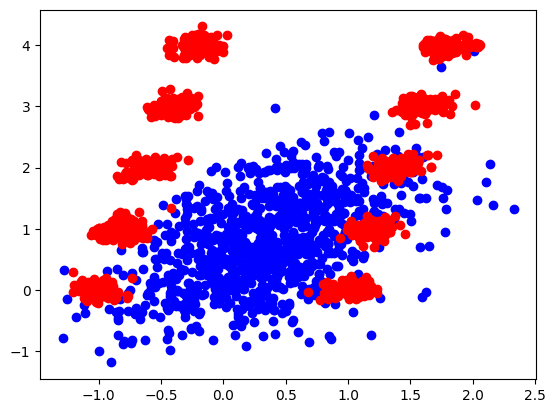

Loss: tensor(0.1962, grad_fn=<MeanBackward0>)


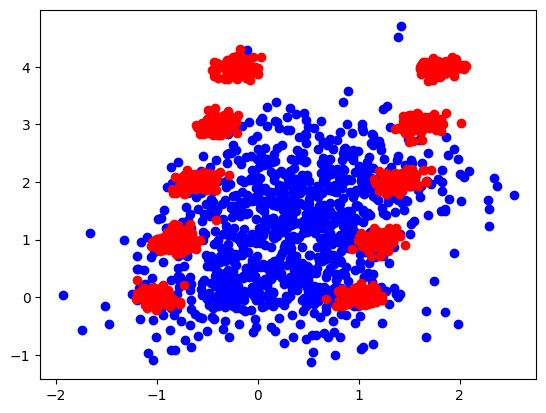

Loss: tensor(0.0886, grad_fn=<MeanBackward0>)


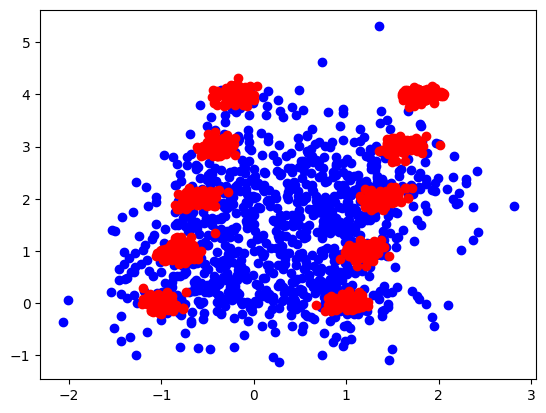

Loss: tensor(0.0381, grad_fn=<MeanBackward0>)


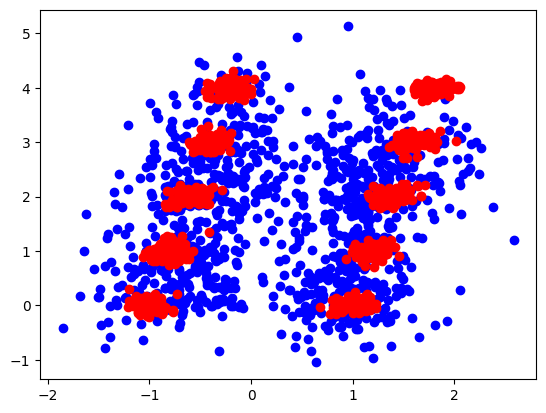

Loss: tensor(0.0204, grad_fn=<MeanBackward0>)


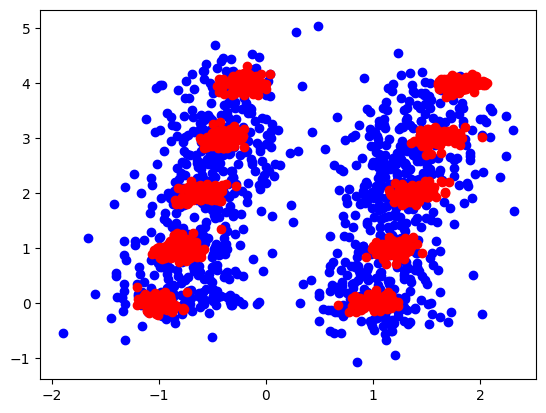

Loss: tensor(0.0126, grad_fn=<MeanBackward0>)


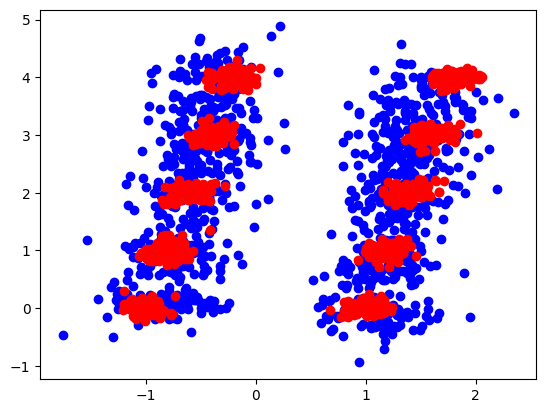

Loss: tensor(0.0087, grad_fn=<MeanBackward0>)


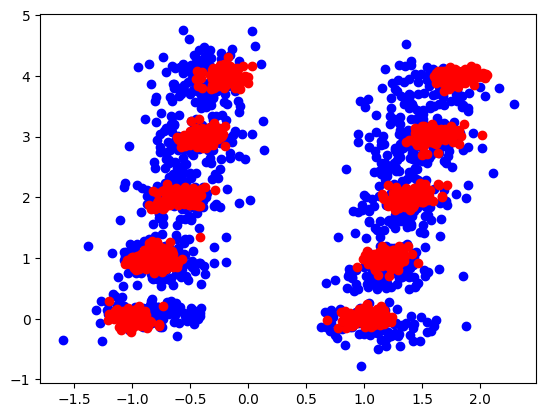

Loss: tensor(0.0067, grad_fn=<MeanBackward0>)


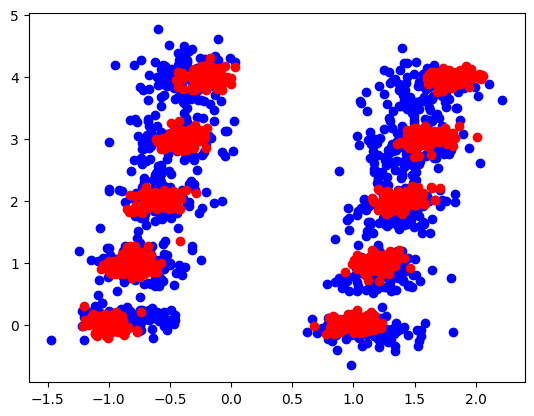

Loss: tensor(0.0058, grad_fn=<MeanBackward0>)


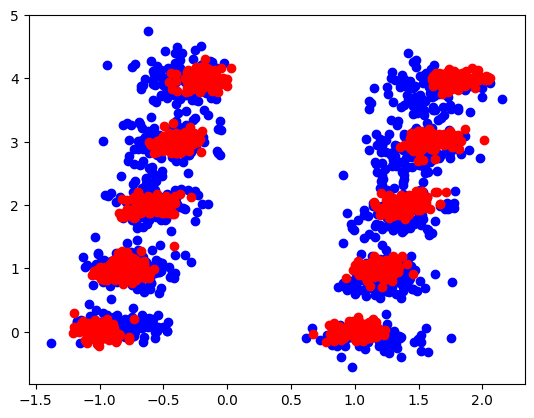

Loss: tensor(0.0053, grad_fn=<MeanBackward0>)


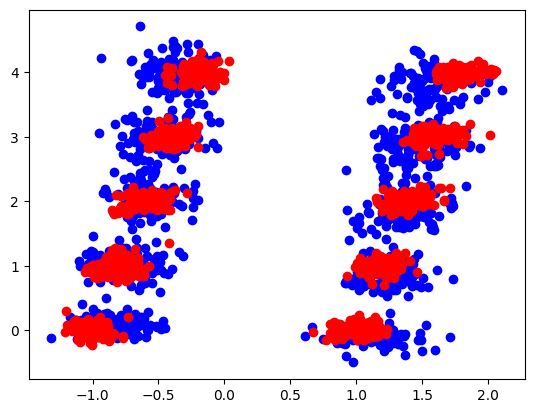

Loss: tensor(0.0051, grad_fn=<MeanBackward0>)


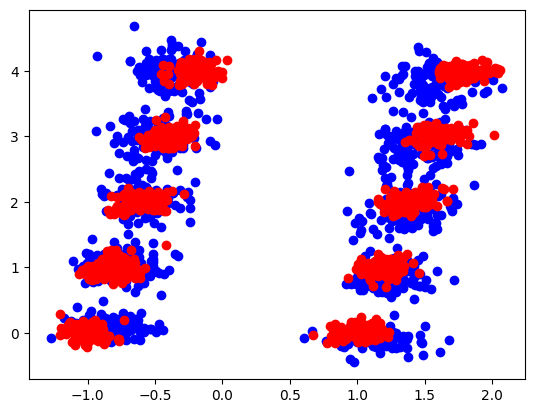

Loss: tensor(0.0050, grad_fn=<MeanBackward0>)


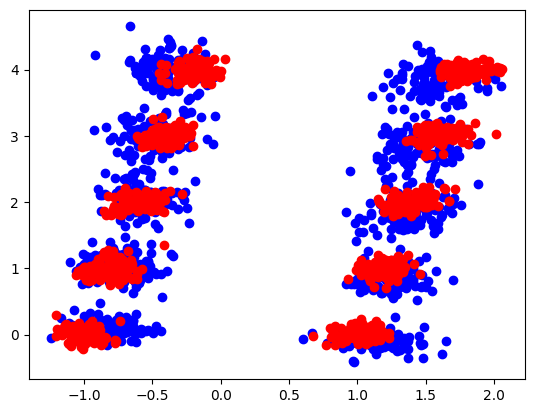

Loss: tensor(0.0050, grad_fn=<MeanBackward0>)


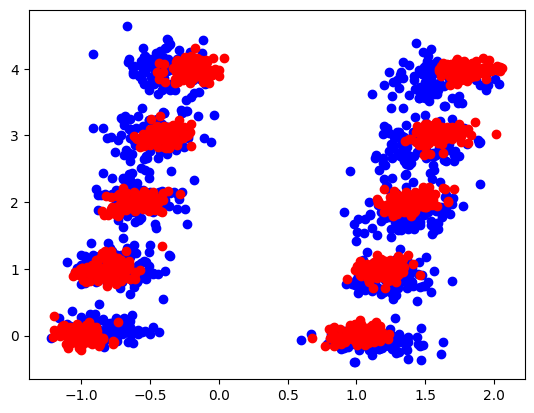

Loss: tensor(0.0049, grad_fn=<MeanBackward0>)


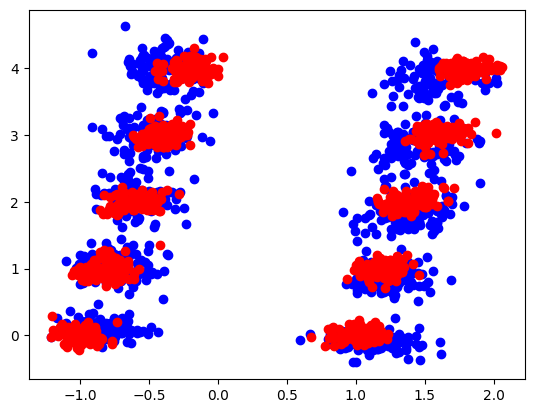

Loss: tensor(0.0049, grad_fn=<MeanBackward0>)


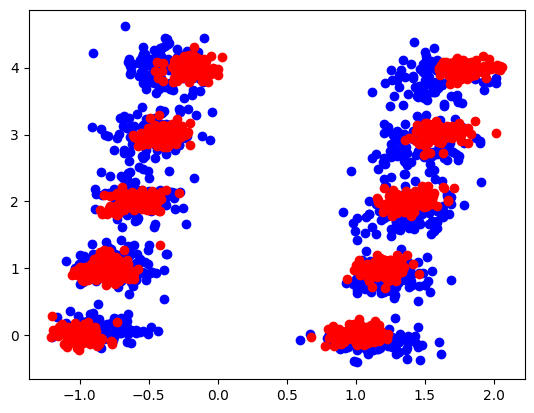

Loss: tensor(0.0049, grad_fn=<MeanBackward0>)


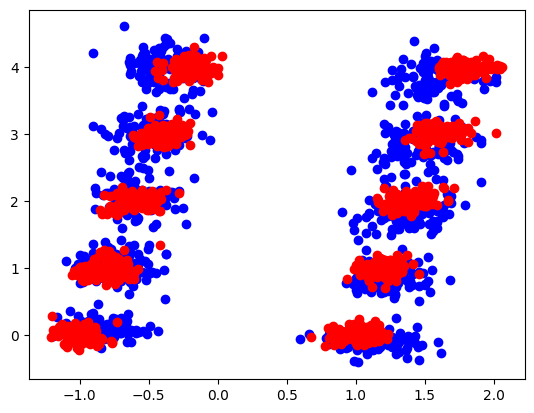

Loss: tensor(0.0049, grad_fn=<MeanBackward0>)


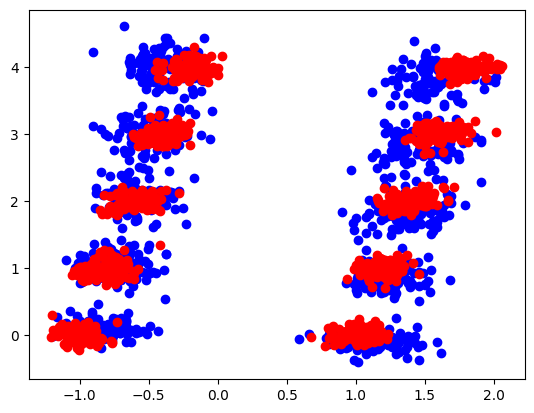

Loss: tensor(0.0049, grad_fn=<MeanBackward0>)


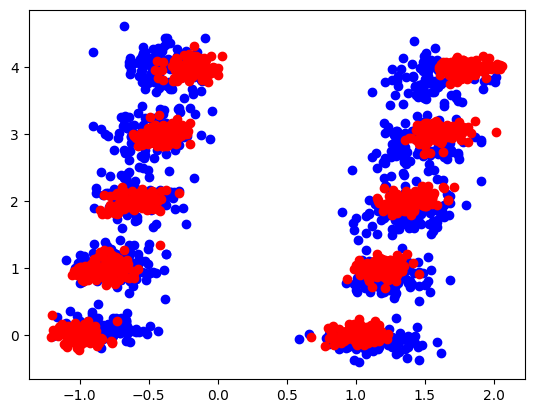

In [131]:
n_epochs = 1000
lr = 0.001
method = "sample" #"mean" "sample"
incl_extra = False # Will include the extraneous subspaces in cl loss if True
extra_dims = 128
cov_strength = 0.5


d = og_varbs.shape[-1] + extra_dims
mask = torch.zeros(d)
mask[0] = 1

noise = torch.randn(len(og_varbs), extra_dims) + cov * torch.randn(len(og_varbs), extra_dims)*og_varbs[:,1:]
natty_varbs = torch.tensor(og_varbs).long()
natty_samps = torch.cat([
    torch.tensor(samples).float(), noise
], dim=-1)
perm = torch.randperm(len(og_varbs)).long()

intrv_varbs = torch.cat([ og_varbs[:,0:1], og_varbs[perm,1:] ], dim=-1)

trg_vecs = natty_samps.clone()
src_vecs = natty_samps[perm]
cl_vecs = get_cl_vectors(natty_varbs, intrv_varbs, natty_samps, method=method)

rot_mtx = torch.nn.utils.parametrizations.orthogonal(torch.nn.Linear(d,d))
optim = torch.optim.Adam(rot_mtx.parameters(), lr=lr)
optim.zero_grad()

with torch.no_grad():
    eye = torch.nn.Linear(d,d)
    eye.weight.data = torch.eye(d).float()
    intrv_vecs = interchange(trg_vecs, src_vecs, eye, mask)
print("Identity")
quick_plot(natty_samps, intrv_vecs)

with torch.no_grad():
    intrv_vecs = interchange(trg_vecs, src_vecs, rot_mtx, mask)
print("Untrained")
quick_plot(natty_samps, intrv_vecs)
prev_loss = np.inf
for epoch in range(n_epochs):
    loss, intrv_vecs = get_loss(
        trg=trg_vecs,
        src=src_vecs,
        mtx=rot_mtx,
        mask=mask,
        cl_vecs=cl_vecs,
        incl_extra=incl_extra,
    )
    loss.backward()
    optim.step()
    optim.zero_grad()
    if epoch % 50 == 0:
        print("Loss:", loss)
        quick_plot(natty_samps, intrv_vecs.detach())
        if loss>=prev_loss:
            print("Converged at epoch", epoch)
            break
        prev_loss = loss.item()